<IPython.core.display.Javascript object>


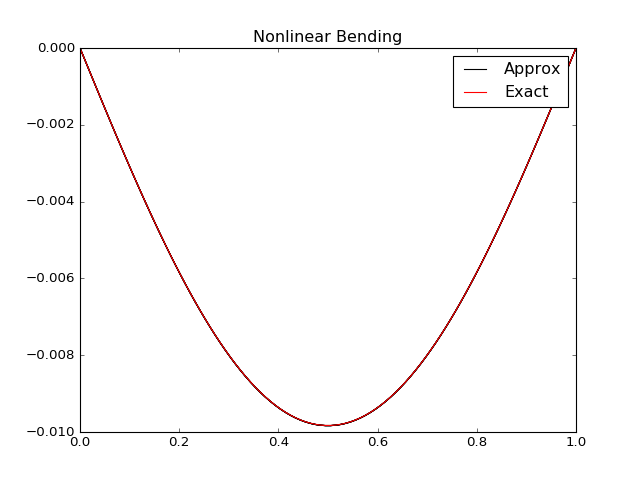

In [1]:
#Does not have actual nonlinear solution, compares to linear solution

import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib notebook
#inputs

w =-75.5                             #weight/length (Newtons/meter) steel
E = 20
I = 5
L = 1                                   #meters
n = 100                                 #nxn matrix
dx= float(L)/(n-1)
dx2=dx*dx
repetition = 5

# Program
def trisolver(X, D):
    N = np.size(X, 0)
    Y = np.transpose(np.empty(N))

    A = np.diagonal(X, -1).copy()
    B = np.diagonal(X).copy()
    C = np.diagonal(X, 1).copy()

    for i in range(0, N - 1):
        mult = A[i] / B[i]
        B[i + 1] = B[i + 1] - (C[i] * mult)
        D[i + 1] = D[i + 1] - (D[i] * mult)

    for j in range(0, N):
        I = N - 1 - j
        if I == (N - 1):
            Y[I] = D[I] / B[I]
        else:
            Y[I] = (D[I] - C[I] * Y[I + 1]) / B[I]

    return Y

def createMatrixA(n):
    global matrixA
    matrixA = [[0]*n for i in range(n)]
    matrixA[0][0]=1
    matrixA[n-1][n-1]=1
    matrixA[1][0]=1/(dx2)
    matrixA[n-2][n-1]=1/(dx2)

    for row in range(1,len(matrixA[0])-1):
        for column in range(1,len(matrixA[0])-1):
            if (column +1 == row or column-1==row):
                matrixA[row][column] = 1/(dx2)

            if (column == row):
                matrixA[row][column] = -2/(dx2)
                
def createMatrixD():
    global matrixD
    global matrixA
    rows = len(matrixA[0])
    matrixD = [float(w)]*rows
    matrixD[0]=0
    matrixD[len(matrixD)-1]=0

    
def createMatrixDp():
    global matrixD
    global U
    global M
    matrixDp = np.zeros(len(M))
    for i in range(1,len(M)-1):
        input = M[i]*(1 + ((U[i+1] - U[i-1])/(2*dx))**2)**(3/2)
        matrixD[i]=input
    matrixD[0]=0
    matrixD[len(matrixDp)-1]=0
    
def createXaxis(n,dx):
    global x
    x=[dx]*n
    for c in range (n):
        x[c]=c*dx


# M Implementation

createXaxis(n,dx)
createMatrixA(n)
createMatrixD()
M=trisolver(matrixA,matrixD)
# U Implementation

M = M / (E*I)
M1 = M.copy()
U=trisolver(matrixA, M1)
plt.figure()
plt.plot(x, U, 'k', label='Approx')
#print(U, 'Linear')

for k in range(repetition):
    createMatrixA(n)
    createMatrixDp()
    U=trisolver(matrixA,matrixD)
    plt.plot(x,U,'k')
    plt.title('Nonlinear Bending')
    #print(U, 'Repetition')
    
u = np.zeros(n)
for i in range (0, n-1):
    u[i] = (w*x[i]**4/(24*E*I)) - (w*x[i]**3/(12*E*I)) + x[i]*((w/(12*E*I)) - (w/(24*E*I)))
plt.plot(x,u,'r', label = 'Exact')
plt.legend()
#def actualDeflection(x):
#    c=w*E*I*(4*math.pow(x,3)-6*math.pow(x,2)+1)/24
#    return -math.sqrt(1-c*c)+math.sqrt(1-math.pow(w*E*I/24,2))
#real = actualDeflection(x)
#def actualV(x):
#    c = float(-w*E*I * (4 * math.pow(x, 3) - 6 * math.pow(x, 2) + 1) / 24)
#    return c/math.sqrt(1-c*c)
#real = float( actualV(x))
#plt.plot(x,real)
#plt.plot(x, real)